In [1]:
#Global Imports
import xlrd
import numpy as np
import pandas as pd
from functools import reduce
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import all sheets into a dataframe
rawDF = pd.read_excel('UNMigrantStockTotal2015.xlsx', 
          sheet_name=['CONTENTS', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'ANNEX', 'NOTES'],
          skiprows=[0-13], 
          header=[14])  

In [3]:
#Reading the first sheet into a DF
dfTable1 = rawDF['Table 1']

#Cleaning up the column names
dfTable1.columns = dfTable1.columns.str.replace('International migrant stock at mid-year \(both sexes\)','Both Sexes', regex=True)
dfTable1.columns = dfTable1.columns.str.replace('International migrant stock at mid-year \(male\)','Male', regex=True)
dfTable1.columns = dfTable1.columns.str.replace('International migrant stock at mid-year \(female\)','Female', regex=True)
dfTable1.columns = dfTable1.columns.str.replace('Country code','Country Code', regex=True)
dfTable1.columns = dfTable1.columns.str.replace('Major area\, region\, country or area of destination','Region', regex=True)

#Cleaning up the unwanted columns
dfTable1.drop(['Notes'], axis = 1, inplace = True)
dfTable1.drop(['Sort\norder'], axis = 1, inplace = True)
dfTable1.drop(['Type of data (a)'], axis = 1, inplace = True)
dfTable1.drop(['Country Code'], axis = 1, inplace = True)

#Renaming Headers
dfTable1 = dfTable1.rename(
    columns={
        'Unnamed: 6': 'Both Sexes',
        'Unnamed: 7': 'Both Sexes',
        'Unnamed: 8': 'Both Sexes',
        'Unnamed: 9': 'Both Sexes',
        'Unnamed: 10': 'Both Sexes',
        'Unnamed: 12': 'Male',
        'Unnamed: 13': 'Male',
        'Unnamed: 14': 'Male',
        'Unnamed: 15': 'Male',
        'Unnamed: 16': 'Male',
        'Unnamed: 18': 'Female',
        'Unnamed: 19': 'Female',
        'Unnamed: 20': 'Female',
        'Unnamed: 21': 'Female',
        'Unnamed: 22': 'Female',
    })
#The first column with null value was causing issues, renaming it to Region
dfTable1["Region"] = dfTable1["Region"].fillna("Region")

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable1BothSexes = dfTable1[['Region', 'Both Sexes']]
dfTable1BothSexes.insert(0, "Gender", "Both Sexes", True)
dfTable1BothSexes.iloc[0,0] = 'Gender'
dfTable1BothSexes.columns = dfTable1BothSexes.iloc[0]
dfTable1BothSexes = dfTable1BothSexes.reindex(dfTable1BothSexes.index.drop(0))

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable1Male = dfTable1[['Region', 'Male']]
dfTable1Male.insert(0, "Gender", "Male", True)
dfTable1Male.iloc[0,0] = 'Gender'
dfTable1Male.columns = dfTable1Male.iloc[0]
dfTable1Male = dfTable1Male.reindex(dfTable1Male.index.drop(0))

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable1Female = dfTable1[['Region', 'Female']]
dfTable1Female.insert(0, "Gender", "Female", True)
dfTable1Female.iloc[0,0] = 'Gender'
dfTable1Female.columns = dfTable1Female.iloc[0]
dfTable1Female = dfTable1Female.reindex(dfTable1Female.index.drop(0))

#Melting all three dataframes to convert them into long form
dfTable1BothSexes = (
    dfTable1BothSexes
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International Migrant Stock')
)
dfTable1Male = (
    dfTable1Male
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International Migrant Stock')
)
dfTable1Female = (
    dfTable1Female
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International Migrant Stock')
)

#Pivoting all three dataframes based on region and year
dfTable1BothSexes = dfTable1BothSexes.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable1Male = dfTable1Male.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable1Female = dfTable1Female.pivot(index = ["Region", "Year"], columns = ['Gender'])

#Merging all three dataframes
dfTable1DFS = [dfTable1BothSexes, dfTable1Male, dfTable1Female]
dfTable1Merged = pd.concat(dfTable1DFS, axis =1)
dfTable1Merged



/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


International Migrant Stock                
Gender                            Both Sexes    Male  Female
Region      Year                                            
Afghanistan 1990                       57686   32558   25128
            1995                       71522   39105   32417
            2000                       75917   42848   33069
            2005                       87300   49274   38026
            2010                      102246   57709   44537
...                                      ...     ...     ...
Zimbabwe    1995                      431226  246012  185214
            2000                      410041  233843  176198
            2005                      392693  223970  168723
            2010                      397891  226967  170924
            2015                      398866  227379  171487

[1590 rows x 3 columns]

In [4]:
#Reading the first sheet into a DF
dfTable2 = rawDF['Table 2']

#Cleaning up the column names
dfTable2.columns = dfTable2.columns.str.replace('Total population of both sexes at mid-year \(thousands\)','Both Sexes', regex=True)
dfTable2.columns = dfTable2.columns.str.replace('Total male population at mid-year \(thousands\)','Male', regex=True)
dfTable2.columns = dfTable2.columns.str.replace('Total female population at mid-year \(thousands\)','Female', regex=True)
dfTable2.columns = dfTable2.columns.str.replace('Country code','Country Code', regex=True)
dfTable2.columns = dfTable2.columns.str.replace('Major area\, region\, country or area of destination','Region', regex=True)

#Cleaning up the unwanted columns
dfTable2.drop(['Notes'], axis = 1, inplace = True)
dfTable2.drop(['Sort\norder'], axis = 1, inplace = True)
# dfTable2.drop(['Type of data (a)'], axis = 1, inplace = True)
dfTable2.drop(['Country Code'], axis = 1, inplace = True)

#Renaming Headers
dfTable2 = dfTable2.rename(
    columns={
        'Unnamed: 5': 'Both Sexes',
        'Unnamed: 6': 'Both Sexes',
        'Unnamed: 7': 'Both Sexes',
        'Unnamed: 8': 'Both Sexes',
        'Unnamed: 9': 'Both Sexes',
        'Unnamed: 11': 'Male',
        'Unnamed: 12': 'Male',
        'Unnamed: 13': 'Male',
        'Unnamed: 14': 'Male',
        'Unnamed: 15': 'Male',
        'Unnamed: 17': 'Female',
        'Unnamed: 18': 'Female',
        'Unnamed: 19': 'Female',
        'Unnamed: 20': 'Female',
        'Unnamed: 21': 'Female',
    })
#The first column with null value was causing issues, renaming it to Region
dfTable2["Region"] = dfTable2["Region"].fillna("Region")

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable2BothSexes = dfTable2[['Region', 'Both Sexes']]
dfTable2BothSexes.insert(0, "Gender", "Both Sexes", True)
dfTable2BothSexes.iloc[0,0] = 'Gender'
dfTable2BothSexes.columns = dfTable2BothSexes.iloc[0]
dfTable2BothSexes = dfTable2BothSexes.reindex(dfTable2BothSexes.index.drop(0))



#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable2Male = dfTable2[['Region', 'Male']]
dfTable2Male.insert(0, "Gender", "Male", True)
dfTable2Male.iloc[0,0] = 'Gender'
dfTable2Male.columns = dfTable2Male.iloc[0]
dfTable2Male = dfTable2Male.reindex(dfTable2Male.index.drop(0))


#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable2Female = dfTable2[['Region', 'Female']]
dfTable2Female.insert(0, "Gender", "Female", True)
dfTable2Female.iloc[0,0] = 'Gender'
dfTable2Female.columns = dfTable2Female.iloc[0]
dfTable2Female = dfTable2Female.reindex(dfTable2Female.index.drop(0))


#Melting all three dataframes to convert them into long form
dfTable2BothSexes = (
    dfTable2BothSexes
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'Total population')
)
dfTable2Male = (
    dfTable2Male
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'Total population')
)
dfTable2Female = (
    dfTable2Female
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'Total population')
)
dfTable2BothSexes['Year'] = dfTable2BothSexes['Year'].astype(int).round(decimals = 0)
dfTable2Male['Year'] = dfTable2Male['Year'].astype(int).round(decimals = 0)
dfTable2Female['Year'] = dfTable2Female['Year'].astype(int).round(decimals = 0)

#Pivoting all three dataframes based on region and year
dfTable2BothSexes = dfTable2BothSexes.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable2Male = dfTable2Male.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable2Female = dfTable2Female.pivot(index = ["Region", "Year"], columns = ['Gender'])

#Merging all three dataframes
dfTable2DFS = [dfTable2BothSexes, dfTable2Male, dfTable2Female]
dfTable2Merged = pd.concat(dfTable2DFS, axis =1)
dfTable2Merged


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Total population                      
Gender                 Both Sexes       Male     Female
Region      Year                                       
Afghanistan 1990        12067.570   6179.834   5887.736
            1995        16772.522   8682.442    8090.08
            2000        19701.940  10146.537   9555.403
            2005        24399.948  12616.326  11783.622
            2010        27962.207  14367.633  13594.574
...                           ...        ...        ...
Zimbabwe    1995        11683.136   5805.632   5877.504
            2000        12499.981   6219.848   6280.133
            2005        12984.418   6436.238    6548.18
            2010        13973.897   6905.036   7068.861
            2015        15602.751   7687.557   7915.194

[1590 rows x 3 columns]

In [5]:
#Reading the first sheet into a DF
dfTable3 = rawDF['Table 3']

#Cleaning up the column names
dfTable3.columns = dfTable3.columns.str.replace('International migrant stock as a percentage of the total population \(both sexes\)','Both Sexes', regex=True)
dfTable3.columns = dfTable3.columns.str.replace('International migrant stock as a percentage of the total population \(male\)','Male', regex=True)
dfTable3.columns = dfTable3.columns.str.replace('International migrant stock as a percentage of the total population \(female\)','Female', regex=True)
dfTable3.columns = dfTable3.columns.str.replace('Country code','Country Code', regex=True)
dfTable3.columns = dfTable3.columns.str.replace('Major area\, region\, country or area of destination','Region', regex=True)

#Cleaning up the unwanted columns
dfTable3.drop(['Notes'], axis = 1, inplace = True)
dfTable3.drop(['Sort\norder'], axis = 1, inplace = True)
dfTable3.drop(['Type of data (a)'], axis = 1, inplace = True)
dfTable3.drop(['Country Code'], axis = 1, inplace = True)

#Renaming Headers
dfTable3 = dfTable3.rename(
    columns={
        'Unnamed: 6': 'Both Sexes',
        'Unnamed: 7': 'Both Sexes',
        'Unnamed: 8': 'Both Sexes',
        'Unnamed: 9': 'Both Sexes',
        'Unnamed: 10': 'Both Sexes',
        'Unnamed: 12': 'Male',
        'Unnamed: 13': 'Male',
        'Unnamed: 14': 'Male',
        'Unnamed: 15': 'Male',
        'Unnamed: 16': 'Male',
        'Unnamed: 18': 'Female',
        'Unnamed: 19': 'Female',
        'Unnamed: 20': 'Female',
        'Unnamed: 21': 'Female',
        'Unnamed: 22': 'Female',
    })
#The first column with null value was causing issues, renaming it to Region
dfTable3["Region"] = dfTable3["Region"].fillna("Region")

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable3BothSexes = dfTable3[['Region', 'Both Sexes']]
dfTable3BothSexes.insert(0, "Gender", "Both Sexes", True)
dfTable3BothSexes.iloc[0,0] = 'Gender'
dfTable3BothSexes.columns = dfTable3BothSexes.iloc[0]
dfTable3BothSexes = dfTable3BothSexes.reindex(dfTable3BothSexes.index.drop(0))

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable3Male = dfTable3[['Region', 'Male']]
dfTable3Male.insert(0, "Gender", "Male", True)
dfTable3Male.iloc[0,0] = 'Gender'
dfTable3Male.columns = dfTable3Male.iloc[0]
dfTable3Male = dfTable3Male.reindex(dfTable3Male.index.drop(0))

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable3Female = dfTable3[['Region', 'Female']]
dfTable3Female.insert(0, "Gender", "Female", True)
dfTable3Female.iloc[0,0] = 'Gender'
dfTable3Female.columns = dfTable3Female.iloc[0]
dfTable3Female = dfTable3Female.reindex(dfTable3Female.index.drop(0))

#Melting all three dataframes to convert them into long form
dfTable3BothSexes = (
    dfTable3BothSexes
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)
dfTable3Male = (
    dfTable3Male
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)
dfTable3Female = (
    dfTable3Female
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)

dfTable3BothSexes['Year'] = dfTable3BothSexes['Year'].astype(int).round(decimals = 0)
dfTable3Male['Year'] = dfTable3Male['Year'].astype(int).round(decimals = 0)
dfTable3Female['Year'] = dfTable3Female['Year'].astype(int).round(decimals = 0)

#Pivoting all three dataframes based on region and year
dfTable3BothSexes = dfTable3BothSexes.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable3Male = dfTable3Male.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable3Female = dfTable3Female.pivot(index = ["Region", "Year"], columns = ['Gender'])

#Merging all three dataframes
dfTable3DFS = [dfTable3BothSexes, dfTable3Male, dfTable3Female]
dfTable3Merged = pd.concat(dfTable3DFS, axis =1)

dfTable3Merged


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


International migrant stock %                    
Gender                              Both Sexes      Male    Female
Region      Year                                                  
Afghanistan 1990                      0.478025  0.526843  0.426785
            1995                      0.426424  0.450392  0.400701
            2000                      0.385328  0.422292  0.346076
            2005                      0.357788  0.390557  0.322702
            2010                      0.365658   0.40166  0.327609
...                                        ...       ...       ...
Zimbabwe    1995                      3.691012  4.237471  3.151236
            2000                      3.280333  3.759626  2.805641
            2005                       3.02434  3.479828   2.57664
            2010                      2.847388  3.286978  2.417985
            2015                      2.556383  2.957754  2.166555

[1590 rows x 3 columns]

In [6]:
#Merging all three dataframes
dfTableDFS = [dfTable1Merged, dfTable2Merged, dfTable3Merged]
dfTableMerged = pd.concat(dfTableDFS, axis =1)
dfTableMerged

International Migrant Stock                 Total population  \
Gender                            Both Sexes    Male  Female       Both Sexes   
Region      Year                                                                
Afghanistan 1990                       57686   32558   25128        12067.570   
            1995                       71522   39105   32417        16772.522   
            2000                       75917   42848   33069        19701.940   
            2005                       87300   49274   38026        24399.948   
            2010                      102246   57709   44537        27962.207   
...                                      ...     ...     ...              ...   
Zimbabwe    1995                      431226  246012  185214        11683.136   
            2000                      410041  233843  176198        12499.981   
            2005                      392693  223970  168723        12984.418   
            2010                      397891  226967  170924        13973.897   
            2015                      398866  227379  171487        15602.751   

                                       International migrant stock %  \
Gender                 Male     Female                    Both Sexes   
Region      Year                                                       
Afghanistan 1990   6179.834   5887.736                      0.478025   
            1995   8682.442    8090.08                      0.426424   
            2000  10146.537   9555.403                      0.385328   
            2005  12616.326  11783.622                      0.357788   
            2010  14367.633  13594.574                      0.365658   
...                     ...        ...                           ...   
Zimbabwe    1995   5805.632   5877.504                      3.691012   
            2000   6219.848   6280.133                      3.280333   
            2005   6436.238    6548.18                       3.02434   
            2010   6905.036   7068.861                      2.847388   
            2015   7687.557   7915.194                      2.556383   

                                      
Gender                Male    Female  
Region      Year                      
Afghanistan 1990  0.526843  0.426785  
            1995  0.450392  0.400701  
            2000  0.422292  0.346076  
            2005  0.390557  0.322702  
            2010   0.40166  0.327609  
...                    ...       ...  
Zimbabwe    1995  4.237471  3.151236  
            2000  3.759626  2.805641  
            2005  3.479828   2.57664  
            2010  3.286978  2.417985  
            2015  2.957754  2.166555  

[1590 rows x 9 columns]

In [7]:
dfTableMerged.head()

International Migrant Stock               Total population  \
Gender                            Both Sexes   Male Female       Both Sexes   
Region      Year                                                              
Afghanistan 1990                       57686  32558  25128        12067.570   
            1995                       71522  39105  32417        16772.522   
            2000                       75917  42848  33069        19701.940   
            2005                       87300  49274  38026        24399.948   
            2010                      102246  57709  44537        27962.207   

                                       International migrant stock %  \
Gender                 Male     Female                    Both Sexes   
Region      Year                                                       
Afghanistan 1990   6179.834   5887.736                      0.478025   
            1995   8682.442    8090.08                      0.426424   
            2000  10146.537   9555.403                      0.385328   
            2005  12616.326  11783.622                      0.357788   
            2010  14367.633  13594.574                      0.365658   

                                      
Gender                Male    Female  
Region      Year                      
Afghanistan 1990  0.526843  0.426785  
            1995  0.450392  0.400701  
            2000  0.422292  0.346076  
            2005  0.390557  0.322702  
            2010   0.40166  0.327609

In [8]:
#Getting a list of Major Areas from the Annex

dfAnnex = rawDF['ANNEX']
dfMajorAreas = dfAnnex['Major area'].unique()
dfRegions = dfAnnex['Region'].unique()

In [9]:
dfMajorAreas

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [10]:
dfRegions

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'South-Eastern Asia', 'Eastern Africa',
       'Northern Europe', 'Eastern Asia', 'Melanesia', 'Micronesia',
       'Central Asia'], dtype=object)

In [11]:
#Cleaning up the Refugee Table
dfTable6 = rawDF['Table 6']

#Cleaning up the column names
dfTable6.columns = dfTable6.columns.str.replace('Estimated refugee stock at mid-year \(both sexes\)','Total Refugee Stock', regex=True)
dfTable6.columns = dfTable6.columns.str.replace('Refugees as a percentage of the international migrant stock','Refugee Percentage of Migrant Stock', regex=True)
dfTable6.columns = dfTable6.columns.str.replace('Annual rate of change of the refugee stock','Refugee Stock Percent Change', regex=True)
dfTable6.columns = dfTable6.columns.str.replace('Country code','Country Code', regex=True)
dfTable6.columns = dfTable6.columns.str.replace('Major area\, region\, country or area of destination','Region', regex=True)

#Cleaning up the unwanted columns
dfTable6.drop(['Notes'], axis = 1, inplace = True)
dfTable6.drop(['Sort\norder'], axis = 1, inplace = True)
dfTable6.drop(['Type of data (a)'], axis = 1, inplace = True)
dfTable6.drop(['Country Code'], axis = 1, inplace = True)

In [12]:
dfTable6

Region Total Refugee Stock Unnamed: 6 Unnamed: 7  \
0                          NaN                1990       1995       2000   
1                        WORLD            18836571   17853840   15827803   
2            Developed regions             2014564    3609670    2997256   
3           Developing regions            16822007   14244170   12830547   
4    Least developed countries             5048391    5160131    3047488   
..                         ...                 ...        ...        ...   
261                      Samoa                   0          0          0   
262                    Tokelau                   0          0          0   
263                      Tonga                   0          0          0   
264                     Tuvalu                   0          0          0   
265  Wallis and Futuna Islands                   0          0          0   

    Unnamed: 8  Unnamed: 9  Unnamed: 10 Refugee Percentage of Migrant Stock  \
0         2005        2010         2015                                1990   
1     13276733    15370755     19577474                           12.346732   
2      2361229     2046917      1954224                            2.445494   
3     10915504    13323838     17623250                           23.968236   
4      2363782     1957884      3443582                            45.56588   
..         ...         ...          ...                                 ...   
261          0           0            0                                   0   
262          0           0            0                                   0   
263          0           0            0                                   0   
264          0           0            0                                   0   
265          0           0            0                                   0   

    Unnamed: 12 Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          1995        2000        2005  2010.000000  2015.000000   
1     11.103013    9.164736    6.941389     6.932687     8.033424   
2      3.910511    2.899391    2.015025     1.544140     1.391085   
3     20.795958   18.507035   14.733162    14.944759    17.073768   
4     44.041961   30.221557    24.08243    19.533425    28.801534   
..          ...         ...         ...          ...          ...   
261           0           0           0     0.000000     0.000000   
262           0           0           0     0.000000     0.000000   
263           0           0           0     0.000000     0.000000   
264           0           0           0     0.000000     0.000000   
265           0           0           0     0.000000     0.000000   

    Refugee Stock Percent Change Unnamed: 18 Unnamed: 19 Unnamed: 20  \
0                      1990-1995   1995-2000   2000-2005   2005-2010   
1                      -2.123497   -3.837069   -5.557223   -0.025089   
2                       9.388424   -5.983348   -7.277379   -5.323293   
3                      -2.839417   -2.332154      -4.561    0.285195   
4                      -0.680327   -7.531747   -4.541459   -4.187109   
..                           ...         ...         ...         ...   
261                           ..          ..          ..          ..   
262                           ..          ..          ..          ..   
263                           ..          ..          ..          ..   
264                           ..          ..          ..          ..   
265                           ..          ..          ..          ..   

    Unnamed: 21  
0     2010-2015  
1      2.947267  
2     -2.087656  
3      2.663652  
4      7.766031  
..          ...  
261          ..  
262          ..  
263          ..  
264          ..  
265          ..  

[266 rows x 18 columns]

In [13]:
#Renaming Headers
dfTable6 = dfTable6.rename(
    columns={
        'Unnamed: 6': 'Total Refugee Stock',
        'Unnamed: 7': 'Total Refugee Stock',
        'Unnamed: 8': 'Total Refugee Stock',
        'Unnamed: 9': 'Total Refugee Stock',
        'Unnamed: 10': 'Total Refugee Stock',
        'Unnamed: 12': 'Refugee Percentage of Migrant Stock',
        'Unnamed: 13': 'Refugee Percentage of Migrant Stock',
        'Unnamed: 14': 'Refugee Percentage of Migrant Stock',
        'Unnamed: 15': 'Refugee Percentage of Migrant Stock',
        'Unnamed: 16': 'Refugee Percentage of Migrant Stock',
        'Unnamed: 18': 'Refugee Stock Percent Change',
        'Unnamed: 19': 'Refugee Stock Percent Change',
        'Unnamed: 20': 'Refugee Stock Percent Change',
        'Unnamed: 21': 'Refugee Stock Percent Change',
        'Unnamed: 22': 'Refugee Stock Percent Change',
    })
#The first column with null value was causing issues, renaming it to Region
dfTable6["Region"] = dfTable6["Region"].fillna("Region")

In [14]:
dfTable6

Region  Total Refugee Stock  Total Refugee Stock  \
0                       Region                 1990                 1995   
1                        WORLD             18836571             17853840   
2            Developed regions              2014564              3609670   
3           Developing regions             16822007             14244170   
4    Least developed countries              5048391              5160131   
..                         ...                  ...                  ...   
261                      Samoa                    0                    0   
262                    Tokelau                    0                    0   
263                      Tonga                    0                    0   
264                     Tuvalu                    0                    0   
265  Wallis and Futuna Islands                    0                    0   

     Total Refugee Stock  Total Refugee Stock  Total Refugee Stock  \
0                   2000                 2005                 2010   
1               15827803             13276733             15370755   
2                2997256              2361229              2046917   
3               12830547             10915504             13323838   
4                3047488              2363782              1957884   
..                   ...                  ...                  ...   
261                    0                    0                    0   
262                    0                    0                    0   
263                    0                    0                    0   
264                    0                    0                    0   
265                    0                    0                    0   

     Total Refugee Stock  Refugee Percentage of Migrant Stock  \
0                   2015                                 1990   
1               19577474                            12.346732   
2                1954224                             2.445494   
3               17623250                            23.968236   
4                3443582                             45.56588   
..                   ...                                  ...   
261                    0                                    0   
262                    0                                    0   
263                    0                                    0   
264                    0                                    0   
265                    0                                    0   

     Refugee Percentage of Migrant Stock  Refugee Percentage of Migrant Stock  \
0                                   1995                                 2000   
1                              11.103013                             9.164736   
2                               3.910511                             2.899391   
3                              20.795958                            18.507035   
4                              44.041961                            30.221557   
..                                   ...                                  ...   
261                                    0                                    0   
262                                    0                                    0   
263                                    0                                    0   
264                                    0                                    0   
265                                    0                                    0   

     Refugee Percentage of Migrant Stock  Refugee Percentage of Migrant Stock  \
0                                   2005                          2010.000000   
1                               6.941389                             6.932687   
2                               2.015025                             1.544140   
3                              14.733162                            14.944759   
4                               24.08243                            19.533425   
..                            

In [15]:
#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable6TotalRefugeeStock = dfTable6[['Region', 'Total Refugee Stock']]
dfTable6TotalRefugeeStock.columns.values[0] = "Region"
dfTable6TotalRefugeeStock.columns.values[1] = "1990"
dfTable6TotalRefugeeStock.columns.values[2] = "1995"
dfTable6TotalRefugeeStock.columns.values[3] = "2000"
dfTable6TotalRefugeeStock.columns.values[4] = "2005"
dfTable6TotalRefugeeStock.columns.values[5] = "2010"
dfTable6TotalRefugeeStock.columns.values[6] = "2015"

dfTable6TotalRefugeeStock = dfTable6TotalRefugeeStock.iloc[1: , :]
dfTable6TotalRefugeeStock

Region      1990      1995  \
1                                                WORLD  18836571  17853840   
2                                    Developed regions   2014564   3609670   
3                                   Developing regions  16822007  14244170   
4                            Least developed countries   5048391   5160131   
5    Less developed regions excluding least develop...  11773616   9084039   
..                                                 ...       ...       ...   
261                                              Samoa         0         0   
262                                            Tokelau         0         0   
263                                              Tonga         0         0   
264                                             Tuvalu         0         0   
265                          Wallis and Futuna Islands         0         0   

         2000      2005      2010      2015  
1    15827803  13276733  15370755  19577474  
2     2997256   2361229   2046917   1954224  
3    12830547  10915504  13323838  17623250  
4     3047488   2363782   1957884   3443582  
5     9783059   8551722  11365954  14179668  
..        ...       ...       ...       ...  
261         0         0         0         0  
262         0         0         0         0  
263         0         0         0         0  
264         0         0         0         0  
265         0         0         0         0  

[265 rows x 7 columns]

In [16]:
#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable6TotalRefugeePercentChange = dfTable6[['Region', 'Refugee Stock Percent Change']]
dfTable6TotalRefugeePercentChange.columns.values[0] = "Region"
dfTable6TotalRefugeePercentChange.columns.values[1] = "1990-1995"
dfTable6TotalRefugeePercentChange.columns.values[2] = "1995-2000"
dfTable6TotalRefugeePercentChange.columns.values[3] = "2000-2005"
dfTable6TotalRefugeePercentChange.columns.values[4] = "2005-2010"
dfTable6TotalRefugeePercentChange.columns.values[5] = "2010-2015"

dfTable6TotalRefugeePercentChange = dfTable6TotalRefugeePercentChange.iloc[1: , :]
dfTable6TotalRefugeePercentChange = dfTable6TotalRefugeePercentChange.melt(
    id_vars=['Region'], 
    value_vars=['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'], 
    var_name='Year',
    value_name='Refugee Percent Change'
)

In [17]:
#Filtering against the major areas
dfTable6TotalRefugeePercentChangeFiltered = dfTable6TotalRefugeePercentChange[dfTable6TotalRefugeePercentChange['Region'].isin(dfMajorAreas)]
dfTable6TotalRefugeePercentChangeFiltered = dfTable6TotalRefugeePercentChangeFiltered.reindex()
# dfTable6TotalRefugeePercentChangeFiltered = dfTable6TotalRefugeePercentChangeFiltered.loc[dfTable6TotalRefugeePercentChangeFiltered["Year"] == '2010-2015']


In [18]:
dfTable6TotalRefugeePercentChangeFiltered

Region       Year Refugee Percent Change
6                              Africa  1990-1995               0.076037
70                               Asia  1990-1995              -3.819461
126                            Europe  1990-1995                13.2017
179   Latin America and the Caribbean  1990-1995             -23.096408
231                  Northern America  1990-1995               1.917003
237                           Oceania  1990-1995              -4.615626
271                            Africa  1995-2000              -8.003244
335                              Asia  1995-2000               1.732425
391                            Europe  1995-2000              -4.942878
444   Latin America and the Caribbean  1995-2000             -41.213183
496                  Northern America  1995-2000              -7.863684
502                           Oceania  1995-2000              -3.690775
536                            Africa  2000-2005              -5.953976
600                              Asia  2000-2005                -4.0395
656                            Europe  2000-2005              -7.804308
709   Latin America and the Caribbean  2000-2005               -0.53924
761                  Northern America  2000-2005              -6.037203
767                           Oceania  2000-2005              -2.334459
801                            Africa  2005-2010              -4.672588
865                              Asia  2005-2010                1.00574
921                            Europe  2005-2010              -4.517854
974   Latin America and the Caribbean  2005-2010               38.89392
1026                 Northern America  2005-2010              -6.472904
1032                          Oceania  2005-2010             -21.867535
1066                           Africa  2010-2015               6.133656
1130                             Asia  2010-2015               1.933203
1186                           Europe  2010-2015              -2.427125
1239  Latin America and the Caribbean  2010-2015              -1.847228
1291                 Northern America  2010-2015              -1.526424
1297                          Oceania  2010-2015               7.804057

In [19]:
dfTable6TotalRefugeePercentChangeFiltered["Refugee Percent Change"] = pd.to_numeric(dfTable6TotalRefugeePercentChangeFiltered["Refugee Percent Change"], downcast="float")


In [20]:
#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable3Male = dfTable3[['Region', 'Male']]
dfTable3Male.insert(0, "Gender", "Male", True)
dfTable3Male.iloc[0,0] = 'Gender'
dfTable3Male.columns = dfTable3Male.iloc[0]
dfTable3Male = dfTable3Male.reindex(dfTable3Male.index.drop(0))

#seperating the dataframe by Gender so i could add a new column with the gender and later merge them all together
dfTable3Female = dfTable3[['Region', 'Female']]
dfTable3Female.insert(0, "Gender", "Female", True)
dfTable3Female.iloc[0,0] = 'Gender'
dfTable3Female.columns = dfTable3Female.iloc[0]
dfTable3Female = dfTable3Female.reindex(dfTable3Female.index.drop(0))

#Melting all three dataframes to convert them into long form
dfTable3BothSexes = (
    dfTable3BothSexes
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)
dfTable3Male = (
    dfTable3Male
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)
dfTable3Female = (
    dfTable3Female
    .melt(id_vars =['Region','Gender'], var_name = ['Year'], value_name = 'International migrant stock %')
)

dfTable3BothSexes['Year'] = dfTable3BothSexes['Year'].astype(int).round(decimals = 0)
dfTable3Male['Year'] = dfTable3Male['Year'].astype(int).round(decimals = 0)
dfTable3Female['Year'] = dfTable3Female['Year'].astype(int).round(decimals = 0)

#Pivoting all three dataframes based on region and year
dfTable3BothSexes = dfTable3BothSexes.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable3Male = dfTable3Male.pivot(index = ["Region", "Year"], columns = ['Gender'])
dfTable3Female = dfTable3Female.pivot(index = ["Region", "Year"], columns = ['Gender'])

#Merging all three dataframes
dfTable3DFS = [dfTable3BothSexes, dfTable3Male, dfTable3Female]
dfTable3Merged = pd.concat(dfTable3DFS, axis =1)

dfTable3Merged


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/pv/fdfq98qx5c7d7fjlwqr7g4l40000gn/T/ipykernel_9801/2160074582.py:17: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  dfTable3BothSexes


KeyError: "The following 'id_vars' are not present in the DataFrame: ['Gender', 'Region']"

In [21]:
#Visualization 1

#Lets see what the total migrant stock looks like for the entire world by Gender and Year

#Getting total migration stock for the world by Gender
dfTableMerged
dfWorld = dfTableMerged.loc['WORLD']
dfWorld = dfWorld.iloc[:,:3]

In [22]:
dfWorld = dfWorld.reset_index()
dfWorld.columns = dfWorld.columns.get_level_values(1)
dfWorld = dfWorld.rename(
    columns={
        '': 'Year'
    })
dfWorld = dfWorld.melt(id_vars='Year')

Text(0, 0.5, 'Migrant Stock')

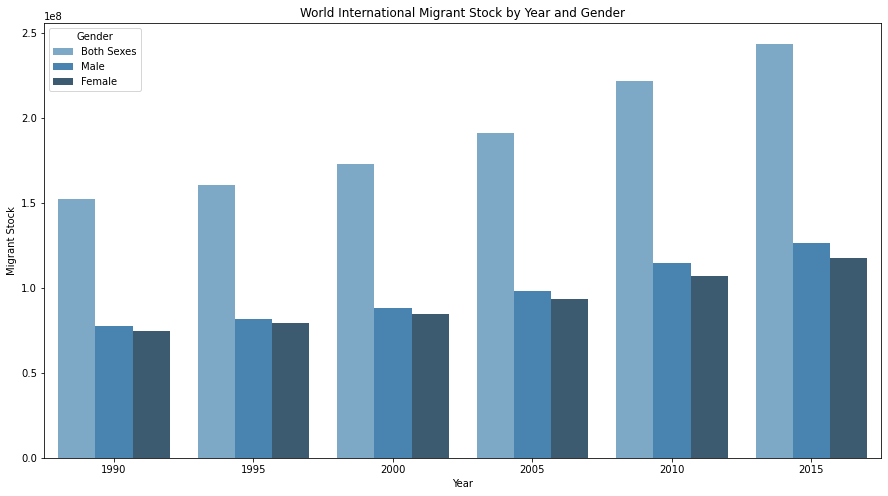

In [23]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Year", y='value', hue="Gender", palette="Blues_d", data=dfWorld)
ax.set_title('World International Migrant Stock by Year and Gender')
ax.set_ylabel('Migrant Stock')

In [24]:
dfTableMerged

International Migrant Stock                 Total population  \
Gender                            Both Sexes    Male  Female       Both Sexes   
Region      Year                                                                
Afghanistan 1990                       57686   32558   25128        12067.570   
            1995                       71522   39105   32417        16772.522   
            2000                       75917   42848   33069        19701.940   
            2005                       87300   49274   38026        24399.948   
            2010                      102246   57709   44537        27962.207   
...                                      ...     ...     ...              ...   
Zimbabwe    1995                      431226  246012  185214        11683.136   
            2000                      410041  233843  176198        12499.981   
            2005                      392693  223970  168723        12984.418   
            2010                      397891  226967  170924        13973.897   
            2015                      398866  227379  171487        15602.751   

                                       International migrant stock %  \
Gender                 Male     Female                    Both Sexes   
Region      Year                                                       
Afghanistan 1990   6179.834   5887.736                      0.478025   
            1995   8682.442    8090.08                      0.426424   
            2000  10146.537   9555.403                      0.385328   
            2005  12616.326  11783.622                      0.357788   
            2010  14367.633  13594.574                      0.365658   
...                     ...        ...                           ...   
Zimbabwe    1995   5805.632   5877.504                      3.691012   
            2000   6219.848   6280.133                      3.280333   
            2005   6436.238    6548.18                       3.02434   
            2010   6905.036   7068.861                      2.847388   
            2015   7687.557   7915.194                      2.556383   

                                      
Gender                Male    Female  
Region      Year                      
Afghanistan 1990  0.526843  0.426785  
            1995  0.450392  0.400701  
            2000  0.422292  0.346076  
            2005  0.390557  0.322702  
            2010   0.40166  0.327609  
...                    ...       ...  
Zimbabwe    1995  4.237471  3.151236  
            2000  3.759626  2.805641  
            2005  3.479828   2.57664  
            2010  3.286978  2.417985  
            2015  2.957754  2.166555  

[1590 rows x 9 columns]

<AxesSubplot:xlabel='Year', ylabel='Migrant Stock'>

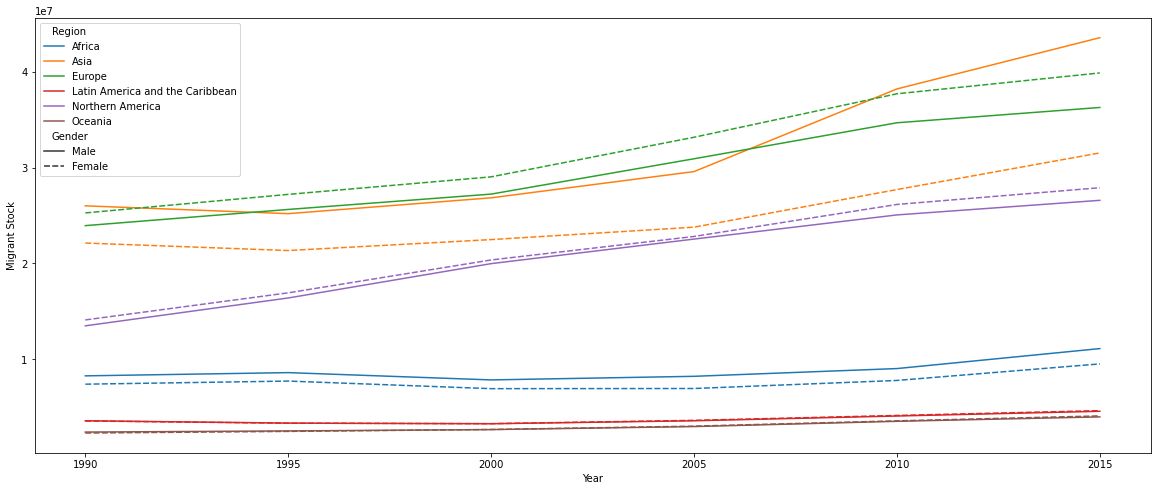

In [25]:
#Visualization 2

#Lets try to visualize total migrant stock Major Areas and by Gender

dfTableMerged2 = dfTableMerged

dfTableMerged2 = dfTableMerged2.reset_index()
dfTableMerged2 = dfTableMerged2.iloc[:,:5]
#Flattening the column names
dfTableMerged2.columns = dfTableMerged2.columns.get_level_values(1)

#Renaming the columns for easy plotting
dfTableMerged2.columns.values[0] = "Region"
dfTableMerged2.columns.values[1] = "Year"

#Melting to convert into wide form for plotting
dfTableMerged2 = dfTableMerged2.melt(id_vars=['Region', 'Year'], value_name='Migrant Stock',)

dfTableMerged2MaleFemale = dfTableMerged2.loc[dfTableMerged2["Gender"] != 'Both Sexes']
dfTableMerged2BothSexes = dfTableMerged2.loc[dfTableMerged2["Gender"] == 'Both Sexes']

#Filtering against the major areas
dfTableMerged2MaleFemale = dfTableMerged2MaleFemale[dfTableMerged2MaleFemale['Region'].isin(dfMajorAreas)]

#Plotting a lineplot with Total Migrant stock in relation to major regions and by Gender
plt.figure(figsize=(20,8))
sns.lineplot(
    data=dfTableMerged2MaleFemale,
    x="Year", 
    y="Migrant Stock", 
    hue="Region",
    style="Gender"
)

<AxesSubplot:title={'center':'Refugee % Change from 1990-2015'}, xlabel='Region', ylabel='Refugee Percent Change'>

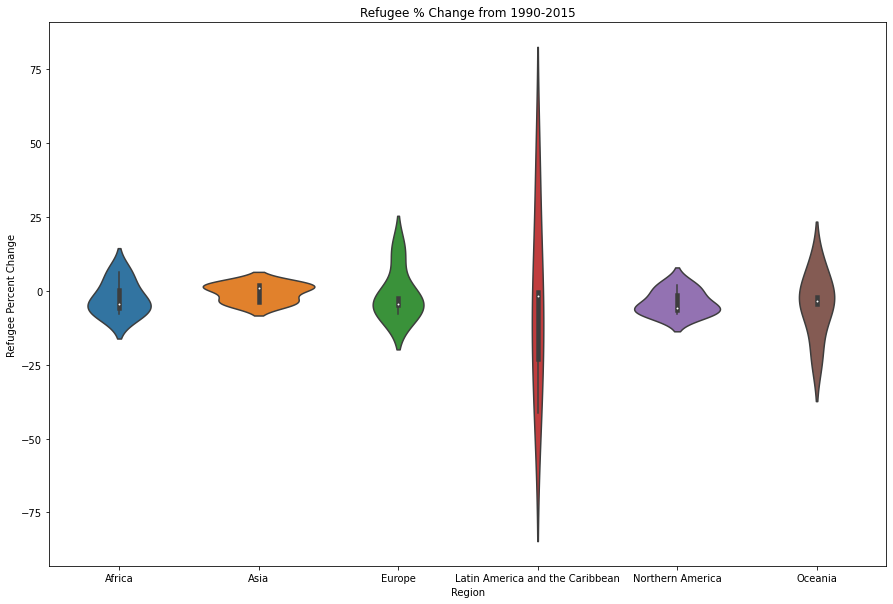

In [26]:
#Visualization 3 (Refugee Percent Change)
plt.figure(figsize=(15,10))
plt.xlabel('Continent')
plt.ylabel('Annual % Change')
plt.title('Refugee % Change from 1990-2015')
sns.violinplot(x="Region", y='Refugee Percent Change', data=dfTable6TotalRefugeePercentChangeFiltered)

In [27]:
#Visualization 4

#Lets try to create a heatmap of 

dfTableMerged4 = dfTableMerged

dfTableMerged4 = dfTableMerged4.reset_index()
dfTableMerged4 = dfTableMerged4.iloc[:,[0,1,8,9,10]]
dfTableMerged4.columns = dfTableMerged4.columns.get_level_values(1)
#Renaming the columns for easy plotting
dfTableMerged4.columns.values[0] = "Region"
dfTableMerged4.columns.values[1] = "Year"

#Melting to convert into wide form for plotting
dfTableMerged4 = dfTableMerged4.melt(id_vars=['Region', 'Year'], value_name='Migrant Stock Percentage',)

dfTableMerged4Filtered = dfTableMerged4[dfTableMerged4['Region'].isin(dfMajorAreas)]
dfTableMerged4BothSexes = dfTableMerged4Filtered.loc[dfTableMerged4Filtered["Gender"] == 'Both Sexes']

dfTableMerged4BothSexes.reset_index()

index                           Region  Year      Gender  \
0       6                           Africa  1990  Both Sexes   
1       7                           Africa  1995  Both Sexes   
2       8                           Africa  2000  Both Sexes   
3       9                           Africa  2005  Both Sexes   
4      10                           Africa  2010  Both Sexes   
5      11                           Africa  2015  Both Sexes   
6      72                             Asia  1990  Both Sexes   
7      73                             Asia  1995  Both Sexes   
8      74                             Asia  2000  Both Sexes   
9      75                             Asia  2005  Both Sexes   
10     76                             Asia  2010  Both Sexes   
11     77                             Asia  2015  Both Sexes   
12    486                           Europe  1990  Both Sexes   
13    487                           Europe  1995  Both Sexes   
14    488                           Europe  2000  Both Sexes   
15    489                           Europe  2005  Both Sexes   
16    490                           Europe  2010  Both Sexes   
17    491                           Europe  2015  Both Sexes   
18    756  Latin America and the Caribbean  1990  Both Sexes   
19    757  Latin America and the Caribbean  1995  Both Sexes   
20    758  Latin America and the Caribbean  2000  Both Sexes   
21    759  Latin America and the Caribbean  2005  Both Sexes   
22    760  Latin America and the Caribbean  2010  Both Sexes   
23    761  Latin America and the Caribbean  2015  Both Sexes   
24   1026                 Northern America  1990  Both Sexes   
25   1027                 Northern America  1995  Both Sexes   
26   1028                 Northern America  2000  Both Sexes   
27   1029                 Northern America  2005  Both Sexes   
28   1030                 Northern America  2010  Both Sexes   
29   1031                 Northern America  2015  Both Sexes   
30   1050                          Oceania  1990  Both Sexes   
31   1051                          Oceania  1995  Both Sexes   
32   1052                          Oceania  2000  Both Sexes   
33   1053                          Oceania  2005  Both Sexes   
34   1054                          Oceania  2010  Both Sexes   
35   1055                          Oceania  2015  Both Sexes   

   Migrant Stock Percentage  
0                   2.48421  
1                  2.269911  
2                  1.818078  
3                  1.650783  
4                  1.612863  
5                  1.740848  
6                  1.503283  
7                  1.339576  
8                  1.328341  
9                  1.352996  
10                 1.580732  
11                 1.708993  
12                 6.825702  
13                 7.260817  
14                 7.746601  
15                 8.790969  
16                 9.841618  
17                10.311703  
18                 1.604365  
19                  1.37375  
20                 1.248539  
21                  1.28286  
22                 1.373538  
23                 1.455578  
24                 9.838663  
25                11.275336  
26                12.862208  
27                13.808229  
28                14.884238  
29                15.227203  
30                17.540821  
31                17.286053  
32                17.252776  
33                18.050693  
34                19.569381  
35                20.596627

In [28]:
dfTableMerged4BothSexes["Migrant Stock Percentage"] = pd.to_numeric(dfTableMerged4BothSexes["Migrant Stock Percentage"], downcast="float")

/var/folders/pv/fdfq98qx5c7d7fjlwqr7g4l40000gn/T/ipykernel_9801/2305660586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTableMerged4BothSexes["Migrant Stock Percentage"] = pd.to_numeric(dfTableMerged4BothSexes["Migrant Stock Percentage"], downcast="float")


Text(0.5, 1.0, 'Migrant Stock as % of Population')

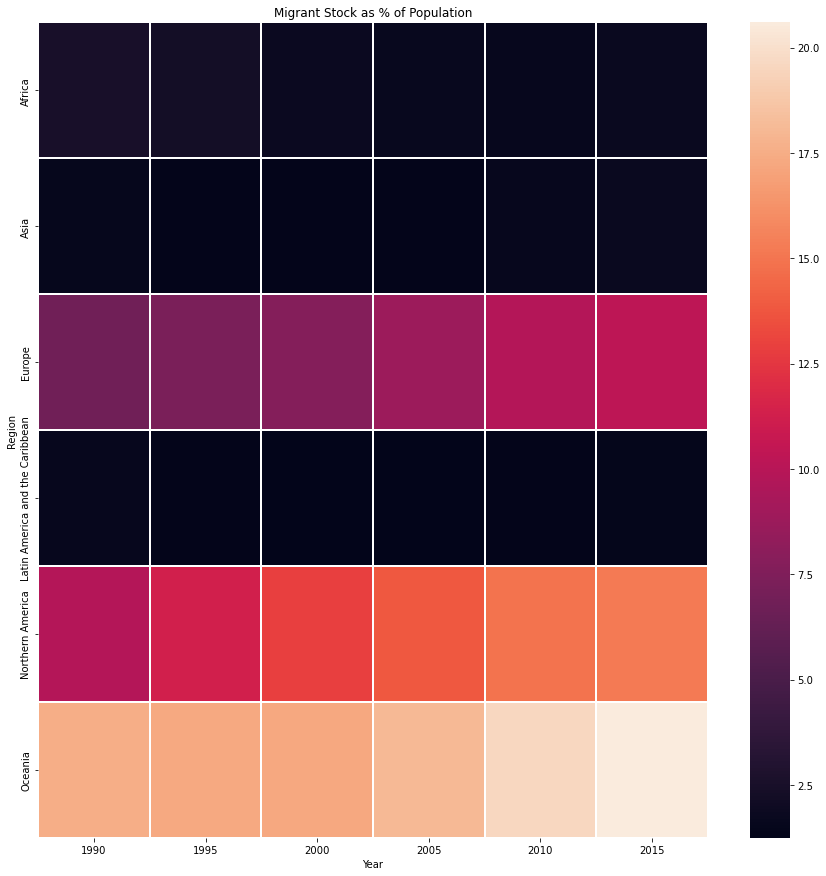

In [29]:
dfTableMerged4BothSexes = dfTableMerged4BothSexes.pivot("Region", "Year", "Migrant Stock Percentage")
plt.subplots(figsize=(15,15)) 
sns.heatmap(dfTableMerged4BothSexes, linewidths=.1).set_title("Migrant Stock as % of Population")

In [30]:
#Visualization 5

import sys
!{sys.executable} -m pip install pycountry-convert

In [31]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=country_name_to_country_alpha2(country)
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
dfTable6TotalRefugeeStock['CountryCode']=alpha3code(dfTable6TotalRefugeeStock['Region'])

In [32]:
dfTable6TotalRefugeeStock

Region      1990      1995  \
1                                                WORLD  18836571  17853840   
2                                    Developed regions   2014564   3609670   
3                                   Developing regions  16822007  14244170   
4                            Least developed countries   5048391   5160131   
5    Less developed regions excluding least develop...  11773616   9084039   
..                                                 ...       ...       ...   
261                                              Samoa         0         0   
262                                            Tokelau         0         0   
263                                              Tonga         0         0   
264                                             Tuvalu         0         0   
265                          Wallis and Futuna Islands         0         0   

         2000      2005      2010      2015 CountryCode  
1    15827803  13276733  15370755  19577474        None  
2     2997256   2361229   2046917   1954224        None  
3    12830547  10915504  13323838  17623250        None  
4     3047488   2363782   1957884   3443582        None  
5     9783059   8551722  11365954  14179668        None  
..        ...       ...       ...       ...         ...  
261         0         0         0         0          WS  
262         0         0         0         0          TK  
263         0         0         0         0          TO  
264         0         0         0         0          TV  
265         0         0         0         0        None  

[265 rows x 8 columns]

In [33]:
import sys
!{sys.executable} -m pip install geopy

In [34]:
dfTable6TotalRefugeeStock

Region      1990      1995  \
1                                                WORLD  18836571  17853840   
2                                    Developed regions   2014564   3609670   
3                                   Developing regions  16822007  14244170   
4                            Least developed countries   5048391   5160131   
5    Less developed regions excluding least develop...  11773616   9084039   
..                                                 ...       ...       ...   
261                                              Samoa         0         0   
262                                            Tokelau         0         0   
263                                              Tonga         0         0   
264                                             Tuvalu         0         0   
265                          Wallis and Futuna Islands         0         0   

         2000      2005      2010      2015 CountryCode  
1    15827803  13276733  15370755  19577474        None  
2     2997256   2361229   2046917   1954224        None  
3    12830547  10915504  13323838  17623250        None  
4     3047488   2363782   1957884   3443582        None  
5     9783059   8551722  11365954  14179668        None  
..        ...       ...       ...       ...         ...  
261         0         0         0         0          WS  
262         0         0         0         0          TK  
263         0         0         0         0          TO  
264         0         0         0         0          TV  
265         0         0         0         0        None  

[265 rows x 8 columns]

In [36]:
dfTable6TotalRefugeeStockMap = dfTable6TotalRefugeeStock.iloc[:, [0,6,7]]
dfTable6TotalRefugeeStockMap = dfTable6TotalRefugeeStockMap.rename(
    columns={
        '2015': 'Refugee Stock'
    })

In [43]:
dfTable6TotalRefugeeStockMap

Region  Refugee Stock  \
1                                                WORLD       19577474   
2                                    Developed regions        1954224   
3                                   Developing regions       17623250   
4                            Least developed countries        3443582   
5    Less developed regions excluding least develop...       14179668   
..                                                 ...            ...   
261                                              Samoa              0   
262                                            Tokelau              0   
263                                              Tonga              0   
264                                             Tuvalu              0   
265                          Wallis and Futuna Islands              0   

    CountryCode  
1          None  
2          None  
3          None  
4          None  
5          None  
..          ...  
261          WS  
262          TK  
263          TO  
264          TV  
265        None  

[265 rows x 3 columns]

<h3>This block takes a while to run as the API is throttled down by default</h3>

In [65]:
import requests
import time

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="GauravBhanot")

def geocodethis():
    lat = []
    long = []
    for i in range(len(dfTable6TotalRefugeeStockMap)):
        try:
            location = geolocator.geocode(dfTable6TotalRefugeeStockMap.iloc[i]['Region'])
            lat.append(location.latitude)
            long.append(location.longitude)
            #time.sleep(1.1)
        except:
            lat.append(np.nan)
            long.append(np.nan)
    dfTable6TotalRefugeeStockMap["Latitude"] = lat
    dfTable6TotalRefugeeStockMap["Longitude"] = long
geocodethis()

In [76]:
dfTable6TotalRefugeeStockMap = dfTable6TotalRefugeeStockMap.dropna()
dfTable6TotalRefugeeStockMap.to_csv('geo.csv')

In [77]:
import sys
!{sys.executable} -m pip install folium

In [78]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(dfTable6TotalRefugeeStockMap)):
        lat = dfTable6TotalRefugeeStockMap.iloc[i]['Latitude']
        long = dfTable6TotalRefugeeStockMap.iloc[i]['Longitude']
        radius=2
        popup_text = """Country : {}<br>
                    %Refugee Stock : {}<br>"""
        popup_text = popup_text.format(dfTable6TotalRefugeeStockMap.iloc[i]['Region'],
                                   dfTable6TotalRefugeeStockMap.iloc[i]['Refugee Stock']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map
